In [ ]:
!pip install numpy matplotlib seaborn scikit-learn pandas

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [14]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load a subset of 5 categories from the 20 Newsgroups dataset
categories = ['rec.sport.hockey', 'sci.space', 'talk.politics.mideast', 'comp.graphics', 'rec.autos']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Display the selected categories (Target feature names)
print("Target Categories (Labels):", newsgroups.target_names)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=3)  # Improved feature extraction
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Print the features used for classification
print("\nNumber of Features Used:", X_train_vec.shape[1])
print("Sample Features (Words):", vectorizer.get_feature_names_out()[:20])  # Display first 20 features

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB(alpha=0.5)  # Smoothing parameter set to 0.5

# Train the model
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))


Target Categories (Labels): ['comp.graphics', 'rec.autos', 'rec.sport.hockey', 'sci.space', 'talk.politics.mideast']

Number of Features Used: 13459
Sample Features (Words): ['00' '000' '0000' '00000' '0049' '01' '02' '0200' '02139' '02173' '0223'
 '03' '04' '05' '05446' '06' '0666' '0674' '07' '08']

Accuracy: 0.90

Classification Report:
                       precision    recall  f1-score   support

        comp.graphics       0.76      0.97      0.85       277
            rec.autos       0.93      0.87      0.90       294
     rec.sport.hockey       0.96      0.93      0.94       312
            sci.space       0.94      0.82      0.88       306
talk.politics.mideast       0.94      0.92      0.93       278

             accuracy                           0.90      1467
            macro avg       0.91      0.90      0.90      1467
         weighted avg       0.91      0.90      0.90      1467



Target Categories (Labels): ['comp.graphics', 'rec.autos', 'rec.sport.hockey', 'sci.space', 'talk.politics.mideast']

Number of Features Used: 13459
Sample Features (Words): ['00' '000' '0000' '00000' '0049' '01' '02' '0200' '02139' '02173' '0223'
 '03' '04' '05' '05446' '06' '0666' '0674' '07' '08']

Accuracy: 0.90

Classification Report:
                       precision    recall  f1-score   support

        comp.graphics       0.76      0.97      0.85       277
            rec.autos       0.93      0.87      0.90       294
     rec.sport.hockey       0.96      0.93      0.94       312
            sci.space       0.94      0.82      0.88       306
talk.politics.mideast       0.94      0.92      0.93       278

             accuracy                           0.90      1467
            macro avg       0.91      0.90      0.90      1467
         weighted avg       0.91      0.90      0.90      1467



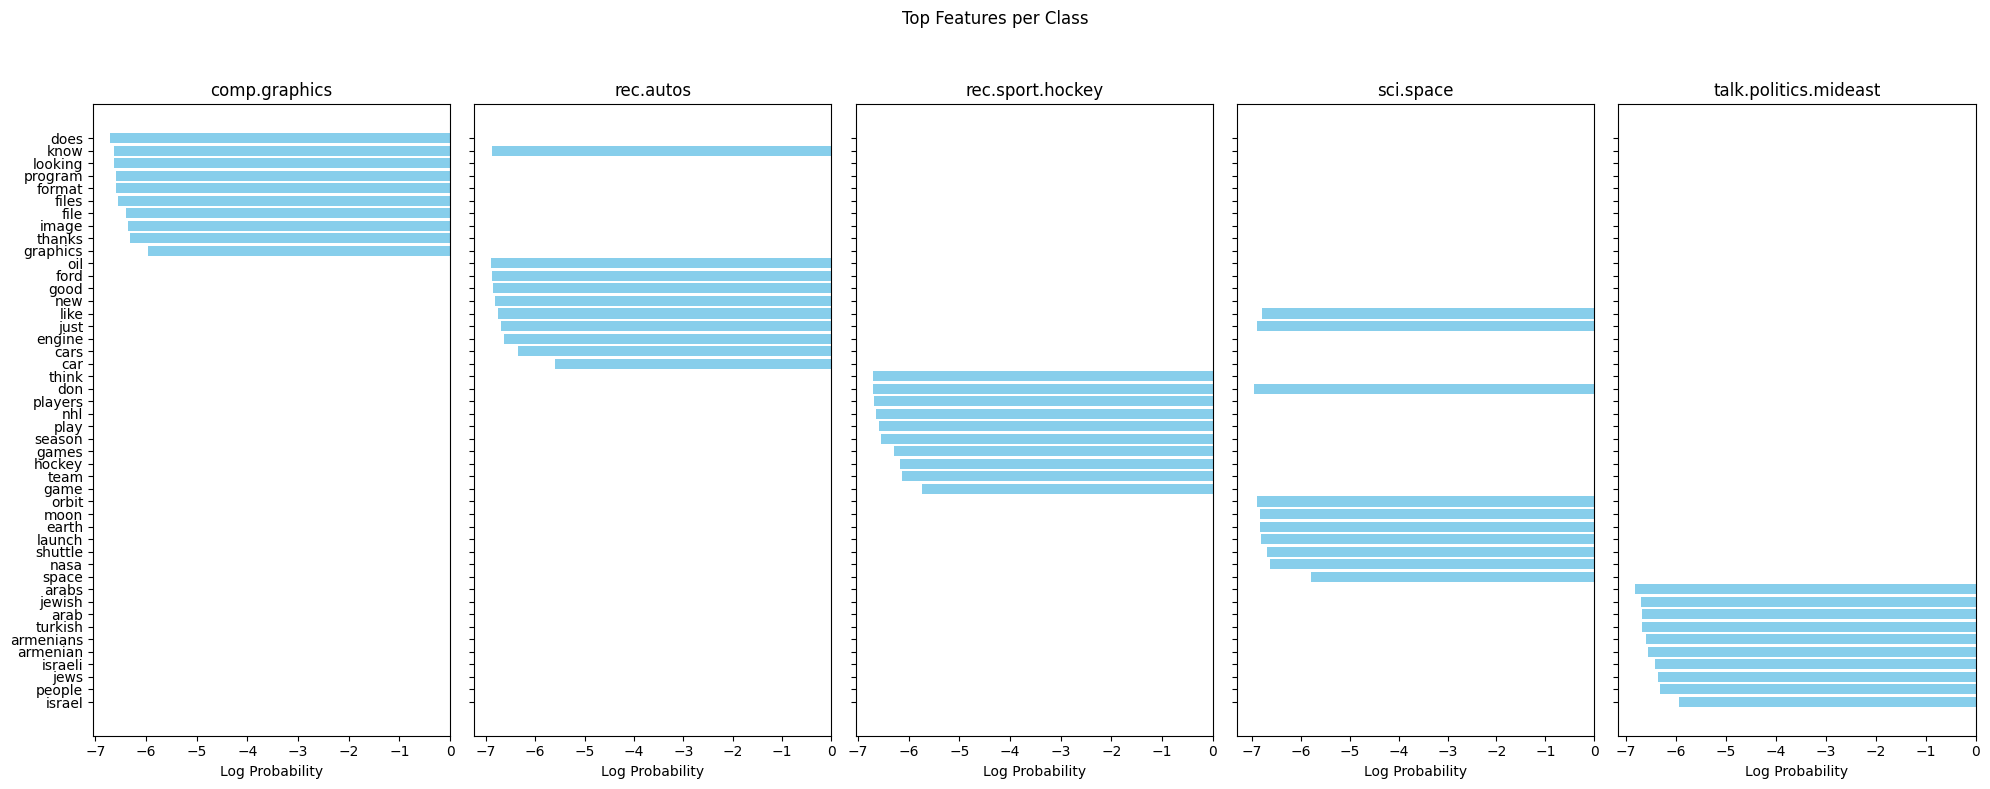

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Load a subset of 5 categories from the 20 Newsgroups dataset
categories = ['rec.sport.hockey', 'sci.space', 'talk.politics.mideast', 'comp.graphics', 'rec.autos']
newsgroups = fetch_20newsgroups(subset='all', categories=categories, remove=('headers', 'footers', 'quotes'))

# Display the selected categories (Target feature names)
print("Target Categories (Labels):", newsgroups.target_names)

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(newsgroups.data, newsgroups.target, test_size=0.3, random_state=42)

# Convert text data into TF-IDF features
vectorizer = TfidfVectorizer(stop_words='english', max_df=0.7, min_df=3)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Print the features used for classification
print("\nNumber of Features Used:", X_train_vec.shape[1])
print("Sample Features (Words):", vectorizer.get_feature_names_out()[:20])

# Initialize the Multinomial Naive Bayes model
model = MultinomialNB(alpha=0.5)
model.fit(X_train_vec, y_train)

# Make predictions
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy: {accuracy:.2f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=newsgroups.target_names))

# Plot feature importance
feature_names = vectorizer.get_feature_names_out()
class_names = newsgroups.target_names
top_n = 10  # Number of top features to display per class

fig, axes = plt.subplots(1, len(class_names), figsize=(20, 8), sharey=True)
for i, class_index in enumerate(range(len(class_names))):
    # Get the top features for each class
    top_features_indices = np.argsort(model.feature_log_prob_[class_index])[-top_n:]
    top_features = feature_names[top_features_indices]
    top_probs = model.feature_log_prob_[class_index][top_features_indices]

    # Plot the top features
    axes[i].barh(top_features, top_probs, color='skyblue')
    axes[i].set_title(class_names[class_index])
    axes[i].set_xlabel("Log Probability")
    axes[i].invert_yaxis()

plt.suptitle("Top Features per Class")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
